In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [10]:
df = pd.read_csv('data/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240127.csv')
df.head(5)

PdId  IncidntNum  Incident Code       Category  \
0   4133422003074    41334220           3074        ROBBERY   
1   5118535807021    51185358           7021  VEHICLE THEFT   
2   4018830907021    40188309           7021  VEHICLE THEFT   
3  11014543126030   110145431          26030          ARSON   
4  10108108004134   101081080           4134        ASSAULT   

                Descript DayOfWeek        Date   Time PdDistrict Resolution  \
0  ROBBERY, BODILY FORCE    Monday  11/22/2004  17:50  INGLESIDE       NONE   
1      STOLEN AUTOMOBILE   Tuesday  10/18/2005  20:00       PARK       NONE   
2      STOLEN AUTOMOBILE    Sunday  02/15/2004  02:00   SOUTHERN       NONE   
3                  ARSON    Friday  02/18/2011  05:27  INGLESIDE       NONE   
4                BATTERY    Sunday  11/21/2010  17:00   SOUTHERN       NONE   

   ... Fix It Zones as of 2017-11-06  2 2  DELETE - HSOC Zones 2 2  \
0  ...                                NaN                      NaN   
1  ...                                NaN                      NaN   
2  ...                                NaN                      NaN   
3  ...                                NaN                      NaN   
4  ...                                NaN                      NaN   

   Fix It Zones as of 2018-02-07 2 2  \
0                                NaN   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   

  CBD, BID and GBD Boundaries as of 2017 2 2  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   Areas of Vulnerability, 2016 2 2  Central Market/Tenderloin Boundary 2 2  \
0                               NaN                                     NaN   
1                               NaN                                     NaN   
2                               NaN                                     NaN   
3                               1.0                                     NaN   
4                               2.0                                     NaN   

   Central Market/Tenderloin Boundary Polygon - Updated 2 2  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   HSOC Zones as of 2018-06-05 2 2  OWED Public Spaces 2 2  Neighborhoods 2  
0                              NaN                     NaN              NaN  
1                              NaN                     NaN              NaN  
2                              NaN                     NaN              NaN  
3                              NaN                     NaN             94.0  
4                              NaN                     NaN             32.0  

[5 rows x 35 columns]

In [11]:
# data_sorted_descending = df.sort_values(by='Date', ascending=False)

# # Display the sorted 'Date' column
# data_sorted_descending.head(100)

## Part 2: Reading about the theory of visualization ##

**Excercise Part 1**

In [12]:
crime_type = "VEHICLE THEFT"
time_interval_start = "06/01/2017"
time_interval_end = "12/30/2017"
specific_hour_start = "12:00"
specific_hour_end = "20:00"

In [13]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [14]:
# Filter for crime type and time interval
filtered_data = df[(df['Category'] == crime_type) &
                   (df['DateTime'] >= pd.to_datetime(time_interval_start)) &
                   (df['DateTime'] <= pd.to_datetime(time_interval_end))].copy()

In [15]:
hour_filtered_data = filtered_data[filtered_data['Time'].between(specific_hour_start, specific_hour_end)].copy()

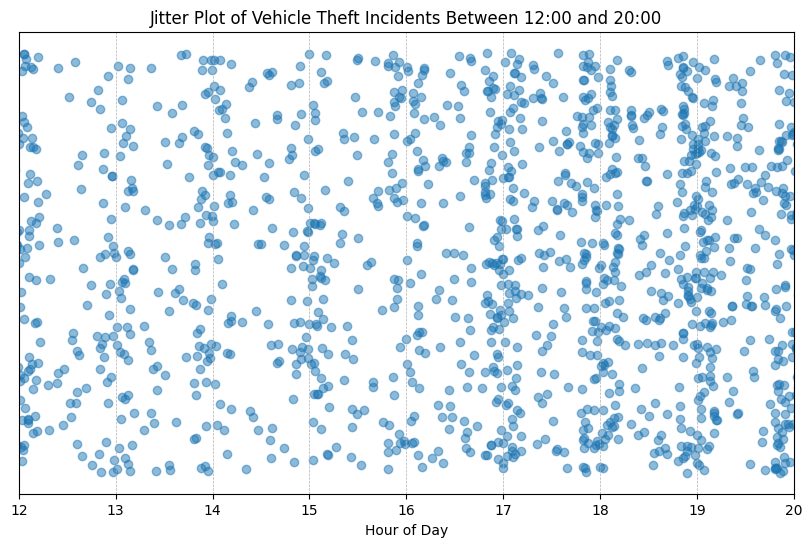

In [16]:
hour_filtered_data['Hour'] = pd.to_datetime(hour_filtered_data['Time'], format='%H:%M').dt.hour + pd.to_datetime(hour_filtered_data['Time'], format='%H:%M').dt.minute / 60

# Generate some jitter to apply to the y-axis positions; the amount of jitter is adjustable
jitter = np.random.uniform(-0.2, 0.2, size=len(hour_filtered_data))

# Create the jitter plot
plt.figure(figsize=(10, 6))
plt.scatter(hour_filtered_data['Hour'] + jitter, np.random.rand(len(hour_filtered_data)), alpha=0.5)
plt.title('Jitter Plot of Vehicle Theft Incidents Between 12:00 and 20:00')
plt.xlabel('Hour of Day')
plt.yticks([])  # Hide y-ticks as they represent just jitter for clarity
plt.xlim(12, 20)  # Focus on the specific hours of interest
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("data/jitterplot.jpg")
plt.show()

In [17]:
df.columns.values.tolist()

['PdId',
 'IncidntNum',
 'Incident Code',
 'Category',
 'Descript',
 'DayOfWeek',
 'Date',
 'Time',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y',
 'location',
 'SF Find Neighborhoods 2 2',
 'Current Police Districts 2 2',
 'Current Supervisor Districts 2 2',
 'Analysis Neighborhoods 2 2',
 'DELETE - Fire Prevention Districts 2 2',
 'DELETE - Police Districts 2 2',
 'DELETE - Supervisor Districts 2 2',
 'DELETE - Zip Codes 2 2',
 'DELETE - Neighborhoods 2 2',
 'DELETE - 2017 Fix It Zones 2 2',
 'Civic Center Harm Reduction Project Boundary 2 2',
 'Fix It Zones as of 2017-11-06  2 2',
 'DELETE - HSOC Zones 2 2',
 'Fix It Zones as of 2018-02-07 2 2',
 'CBD, BID and GBD Boundaries as of 2017 2 2',
 'Areas of Vulnerability, 2016 2 2',
 'Central Market/Tenderloin Boundary 2 2',
 'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
 'HSOC Zones as of 2018-06-05 2 2',
 'OWED Public Spaces 2 2',
 'Neighborhoods 2',
 'DateTime']

In [18]:
category = df['Category'].unique()
category

array(['ROBBERY', 'VEHICLE THEFT', 'ARSON', 'ASSAULT', 'TRESPASS',
       'BURGLARY', 'LARCENY/THEFT', 'WARRANTS', 'OTHER OFFENSES',
       'DRUG/NARCOTIC', 'SUSPICIOUS OCC', 'LIQUOR LAWS', 'VANDALISM',
       'WEAPON LAWS', 'NON-CRIMINAL', 'MISSING PERSON', 'FRAUD',
       'SEX OFFENSES, FORCIBLE', 'SECONDARY CODES', 'DISORDERLY CONDUCT',
       'RECOVERED VEHICLE', 'KIDNAPPING', 'FORGERY/COUNTERFEITING',
       'PROSTITUTION', 'DRUNKENNESS', 'BAD CHECKS',
       'DRIVING UNDER THE INFLUENCE', 'LOITERING', 'STOLEN PROPERTY',
       'SUICIDE', 'BRIBERY', 'EXTORTION', 'EMBEZZLEMENT', 'GAMBLING',
       'PORNOGRAPHY/OBSCENE MAT', 'SEX OFFENSES, NON FORCIBLE', 'TREA'],
      dtype=object)

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
crime_counts = df['Category'].value_counts()
crime_counts

Category
LARCENY/THEFT                  477975
OTHER OFFENSES                 301874
NON-CRIMINAL                   236928
ASSAULT                        167042
VEHICLE THEFT                  126228
DRUG/NARCOTIC                  117821
VANDALISM                      114718
WARRANTS                        99821
BURGLARY                        91067
SUSPICIOUS OCC                  79087
ROBBERY                         54467
MISSING PERSON                  44268
FRAUD                           41348
FORGERY/COUNTERFEITING          22995
SECONDARY CODES                 22378
WEAPON LAWS                     21004
TRESPASS                        19194
PROSTITUTION                    16501
STOLEN PROPERTY                 11450
DISORDERLY CONDUCT               9932
DRUNKENNESS                      9760
SEX OFFENSES, FORCIBLE           8747
RECOVERED VEHICLE                8688
DRIVING UNDER THE INFLUENCE      5652
KIDNAPPING                       4282
ARSON                            3875
EMB

In [21]:
# Filter for crime types with between 1,000 and 10,000 instances
suitable_crimes = crime_counts[(crime_counts >= 1000) & (crime_counts <= 10000)]
# Print suitable crime types
print(suitable_crimes)

Category
DISORDERLY CONDUCT             9932
DRUNKENNESS                    9760
SEX OFFENSES, FORCIBLE         8747
RECOVERED VEHICLE              8688
DRIVING UNDER THE INFLUENCE    5652
KIDNAPPING                     4282
ARSON                          3875
EMBEZZLEMENT                   2984
LIQUOR LAWS                    2840
LOITERING                      2402
SUICIDE                        1291
Name: count, dtype: int64


In [22]:
crime_type_1 = "DISORDERLY CONDUCT"
crime_type_2 = "DRUNKENNESS"
time_interval_start = "2017-01-31" 
time_interval_end = "2017-12-30" 

filtered_data_1 = df[(df['Category'] == crime_type_1) &
                     (df['Date'] >= time_interval_start) &
                     (df['Date'] <= time_interval_end)]

filtered_data_2 = df[(df['Category'] == crime_type_2) &
                     (df['Date'] >= time_interval_start) &
                     (df['Date'] <= time_interval_end)]
latitudes_1 = filtered_data_1['Y']
latitudes_2 = filtered_data_2['Y']

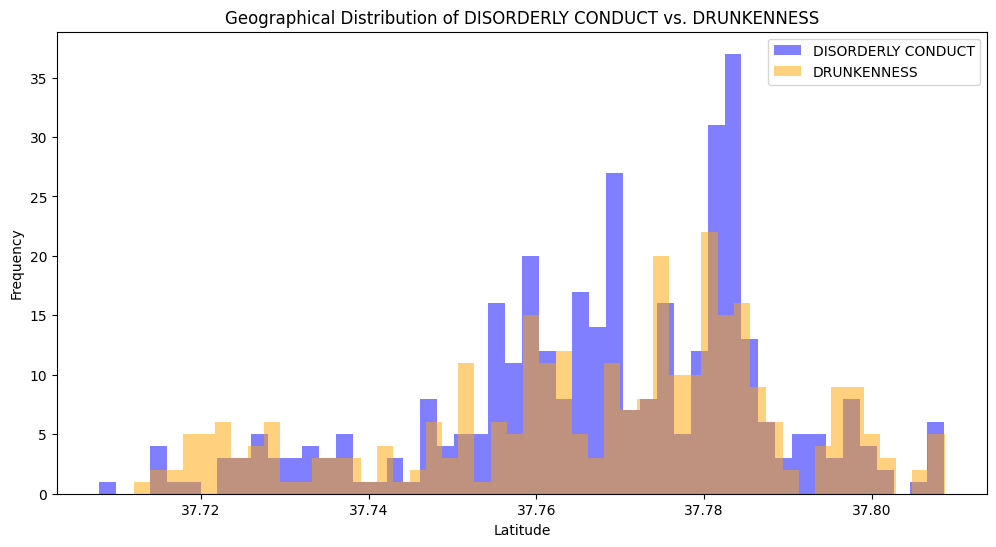

In [23]:
# Compute histograms using numpy.histogram
hist_1, bin_edges_1 = np.histogram(latitudes_1, bins=50)
hist_2, bin_edges_2 = np.histogram(latitudes_2, bins=50)

# Plot histograms
plt.figure(figsize=(12, 6))

# Plot histogram for crime type 1
plt.bar(bin_edges_1[:-1], hist_1, width=(bin_edges_1[1] - bin_edges_1[0]), alpha=0.5, color='blue', label=crime_type_1)

# Plot histogram for crime type 2
plt.bar(bin_edges_2[:-1], hist_2, width=(bin_edges_2[1] - bin_edges_2[0]), alpha=0.5, color='orange', label=crime_type_2)

plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Geographical Distribution of ' + crime_type_1 + ' vs. ' + crime_type_2)
plt.legend()

plt.show()

In [24]:
sampled_time_points = df['Time'].sample(n=25, random_state=42).copy()
sampled_time_points = pd.to_datetime(sampled_time_points, format='%H:%M')

***seaborn.kdeplot***

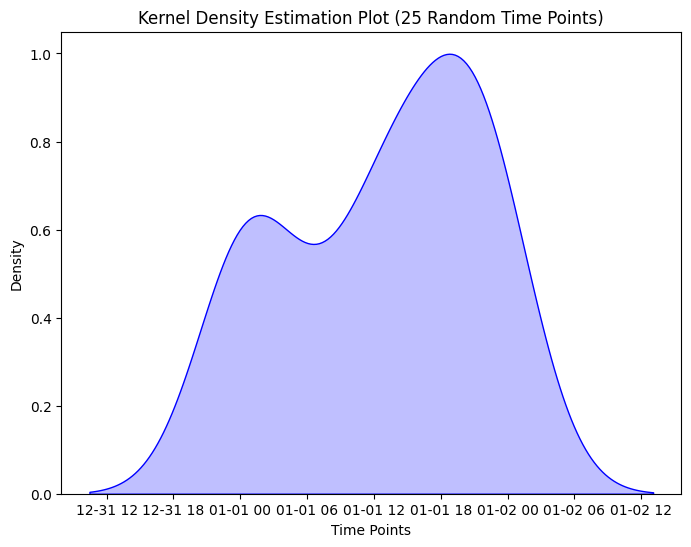

In [25]:
import seaborn as sns
# Plot the KDE plot for the sampled time points
plt.figure(figsize=(8, 6))
sns.kdeplot(data=sampled_time_points, color='blue', fill=True)
plt.title('Kernel Density Estimation Plot (25 Random Time Points)')
plt.xlabel('Time Points')
plt.ylabel('Density')
plt.show()

**Built-in KDE Plotting**

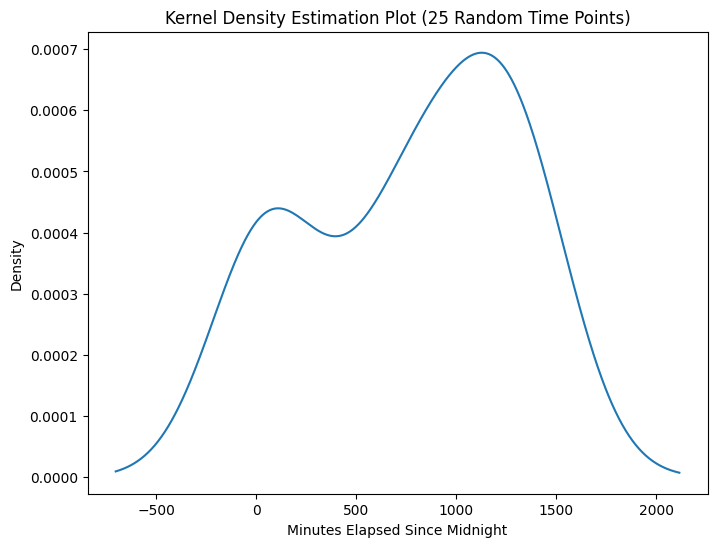

In [26]:
sampled_time_points = sampled_time_points.dt.hour * 60 + sampled_time_points.dt.minute
plt.figure(figsize=(8, 6))
sampled_time_points.plot(kind='kde')
plt.title('Kernel Density Estimation Plot (25 Random Time Points)')
plt.xlabel('Minutes Elapsed Since Midnight')
plt.ylabel('Density')
plt.show()

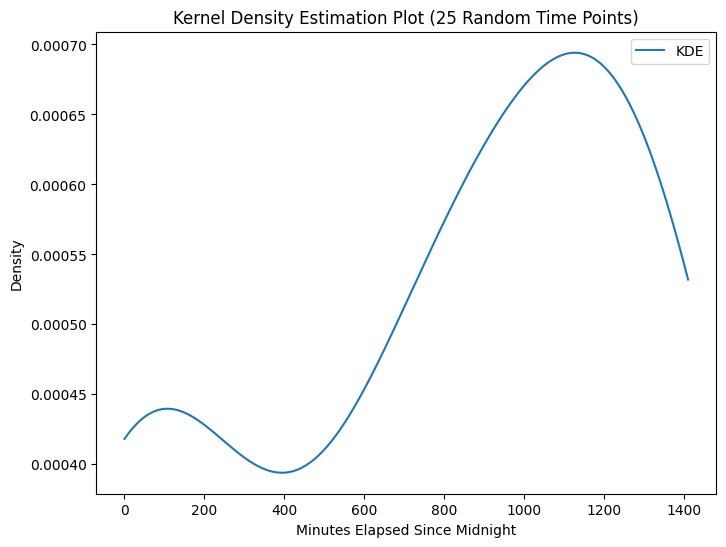

In [27]:
from scipy.stats import gaussian_kde
# Calculate the kernel density estimate
kde = gaussian_kde(sampled_time_points)
x = np.linspace(sampled_time_points.min(), sampled_time_points.max(), 1000)
# Plot the KDE
plt.figure(figsize=(8, 6))
plt.plot(x, kde(x), label='KDE')
plt.title('Kernel Density Estimation Plot (25 Random Time Points)')
plt.xlabel('Minutes Elapsed Since Midnight')
plt.ylabel('Density')
plt.legend()
plt.show()

***Excercise Part 2***

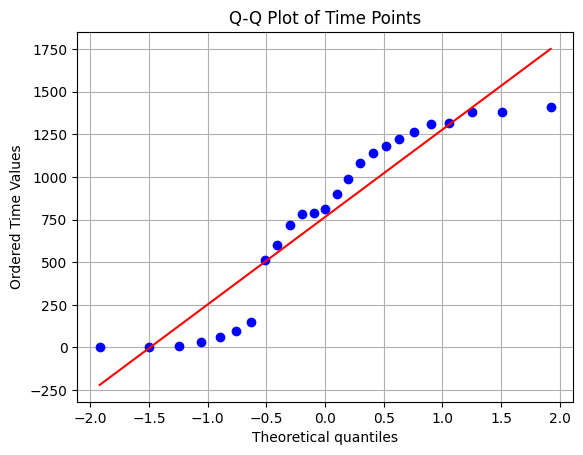

In [28]:
import scipy.stats as stats
# Generate a probability plot
stats.probplot(sampled_time_points, dist='norm', plot=plt)
plt.title('Q-Q Plot of Time Points')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Time Values')
plt.grid(True)
plt.show()

In [29]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [30]:
filtered_df = df[df['Category'].isin(focuscrimes)].copy()
filtered_df.head(5)

PdId  IncidntNum  Incident Code       Category  \
0   4133422003074    41334220           3074        ROBBERY   
1   5118535807021    51185358           7021  VEHICLE THEFT   
2   4018830907021    40188309           7021  VEHICLE THEFT   
4  10108108004134   101081080           4134        ASSAULT   
5  13027069804134   130270698           4134        ASSAULT   

                Descript DayOfWeek       Date   Time PdDistrict Resolution  \
0  ROBBERY, BODILY FORCE    Monday 2004-11-22  17:50  INGLESIDE       NONE   
1      STOLEN AUTOMOBILE   Tuesday 2005-10-18  20:00       PARK       NONE   
2      STOLEN AUTOMOBILE    Sunday 2004-02-15  02:00   SOUTHERN       NONE   
4                BATTERY    Sunday 2010-11-21  17:00   SOUTHERN       NONE   
5                BATTERY   Tuesday 2013-04-02  15:50    TARAVAL       NONE   

   ... DELETE - HSOC Zones 2 2  Fix It Zones as of 2018-02-07 2 2  \
0  ...                     NaN                                NaN   
1  ...                     NaN                                NaN   
2  ...                     NaN                                NaN   
4  ...                     NaN                                NaN   
5  ...                     NaN                                NaN   

   CBD, BID and GBD Boundaries as of 2017 2 2  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
4                                         NaN   
5                                         NaN   

  Areas of Vulnerability, 2016 2 2  Central Market/Tenderloin Boundary 2 2  \
0                              NaN                                     NaN   
1                              NaN                                     NaN   
2                              NaN                                     NaN   
4                              2.0                                     NaN   
5                              1.0                                     NaN   

   Central Market/Tenderloin Boundary Polygon - Updated 2 2  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
4                                                NaN          
5                                                NaN          

   HSOC Zones as of 2018-06-05 2 2  OWED Public Spaces 2 2  Neighborhoods 2  \
0                              NaN                     NaN              NaN   
1                              NaN                     NaN              NaN   
2                              NaN                     NaN              NaN   
4                              NaN                     NaN             32.0   
5                              NaN                     NaN             44.0   

             DateTime  
0 2004-11-22 17:50:00  
1 2005-10-18 20:00:00  
2 2004-02-15 02:00:00  
4 2010-11-21 17:00:00  
5 2013-04-02 15:50:00  

[5 rows x 36 columns]

In [31]:
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
crime_counts_per_day = filtered_df.groupby([filtered_df['Date'].dt.date, 'Category']).size().reset_index(name='Counts')
crime_counts_per_day

Date                     Category  Counts
0      2003-01-01                      ASSAULT      80
1      2003-01-01                     BURGLARY      14
2      2003-01-01           DISORDERLY CONDUCT       3
3      2003-01-01  DRIVING UNDER THE INFLUENCE       2
4      2003-01-01                DRUG/NARCOTIC      29
...           ...                          ...     ...
70189  2018-05-14                VEHICLE THEFT       1
70190  2018-05-14                  WEAPON LAWS       1
70191  2018-05-15                DRUG/NARCOTIC       1
70192  2018-05-15                      ROBBERY       1
70193  2018-05-15                VEHICLE THEFT       1

[70194 rows x 3 columns]

In [32]:
crime_counts_pivot = crime_counts_per_day.pivot(index='Date', columns='Category', values='Counts').fillna(0)
crime_counts_pivot

Category    ASSAULT  BURGLARY  DISORDERLY CONDUCT  \
Date                                                
2003-01-01     80.0      14.0                 3.0   
2003-01-02     27.0      12.0                 1.0   
2003-01-03     30.0      28.0                 5.0   
2003-01-04     29.0      15.0                 2.0   
2003-01-05     38.0       7.0                 2.0   
...             ...       ...                 ...   
2018-05-11     28.0       7.0                 0.0   
2018-05-12     26.0      10.0                 1.0   
2018-05-13     18.0       6.0                 0.0   
2018-05-14      9.0       4.0                 0.0   
2018-05-15      0.0       0.0                 0.0   

Category    DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS  \
Date                                                                  
2003-01-01                          2.0           29.0          6.0   
2003-01-02                          1.0           33.0          1.0   
2003-01-03                          0.0           26.0          1.0   
2003-01-04                          1.0           31.0          0.0   
2003-01-05                          4.0           31.0          3.0   
...                                 ...            ...          ...   
2018-05-11                          0.0           25.0          0.0   
2018-05-12                          0.0            6.0          1.0   
2018-05-13                          0.0            9.0          1.0   
2018-05-14                          2.0            5.0          1.0   
2018-05-15                          0.0            1.0          0.0   

Category    LARCENY/THEFT  PROSTITUTION  ROBBERY  STOLEN PROPERTY  TRESPASS  \
Date                                                                          
2003-01-01           72.0           6.0     10.0              1.0       4.0   
2003-01-02           51.0          10.0      8.0              3.0       4.0   
2003-01-03           65.0          14.0     13.0              2.0       6.0   
2003-01-04           53.0           1.0      8.0              3.0       4.0   
2003-01-05           54.0           1.0     13.0              3.0       1.0   
...                   ...           ...      ...              ...       ...   
2018-05-11           33.0           0.0      4.0              1.0       5.0   
2018-05-12           34.0           1.0      4.0              1.0       2.0   
2018-05-13           22.0           0.0      8.0              1.0       2.0   
2018-05-14            8.0           1.0      3.0              1.0       0.0   
2018-05-15            0.0           0.0      1.0              0.0       0.0   

Category    VANDALISM  VEHICLE THEFT  WEAPON LAWS  
Date                                               
2003-01-01       28.0           31.0          3.0  
2003-01-02       19.0           46.0          4.0  
2003-01-03       18.0           21.0          5.0  
2003-01-04        9.0           46.0          0.0  
2003-01-05       24.0           48.0          8.0  
...               ...            ...          ...  
2018-05-11       17.0            2.0          2.0  
2018-05-12       10.0            1.0          7.0  
2018-05-13        7.0            1.0          3.0  
2018-05-14        5.0            1.0          1.0  
2018-05-15        0.0            1.0          0.0  

[5612 rows x 14 columns]

<Figure size 1500x1000 with 0 Axes>

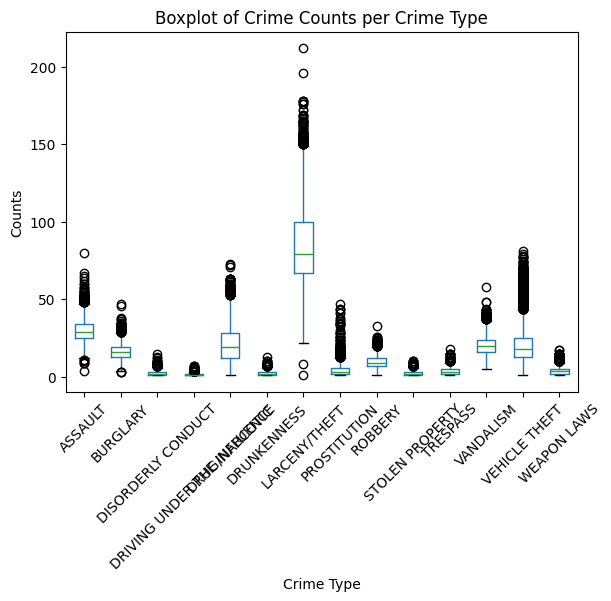

In [33]:
filtered_df = pd.DataFrame(crime_counts_per_day)
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

# As before, we need to create a boxplot
plt.figure(figsize=(15, 10))
boxplot = filtered_df.boxplot(by='Category', column='Counts', grid=False, rot=45, fontsize=10)
plt.title('Boxplot of Crime Counts per Crime Type')
plt.suptitle('')  # Suppress the default title to only show the title set above
plt.xlabel('Crime Type')
plt.ylabel('Counts')
plt.show()

<Figure size 1500x1000 with 0 Axes>

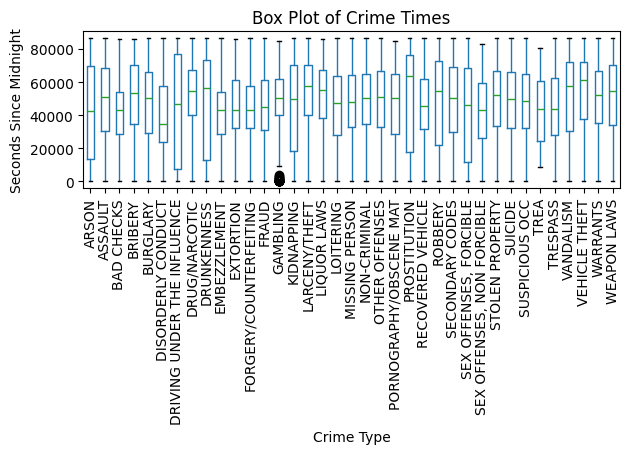

In [34]:
# Calculate seconds since midnight
from datetime import datetime
df['Seconds_Since_Midnight'] = df['Time'].apply(lambda x: (datetime.strptime(x, '%H:%M').hour * 3600) + (datetime.strptime(x, '%H:%M').minute * 60))
# df['Seconds_Since_Midnight'] = df['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

# Box plot for each category
plt.figure(figsize=(15, 10))
df.boxplot(by='Category', column='Seconds_Since_Midnight', grid=False)
plt.title('Box Plot of Crime Times')
plt.suptitle('')
plt.xlabel('Crime Type')
plt.ylabel('Seconds Since Midnight')
plt.xticks(rotation=90)  
plt.tight_layout() 
plt.show()

## Part 4: Visualizing geodata with Plotly ##

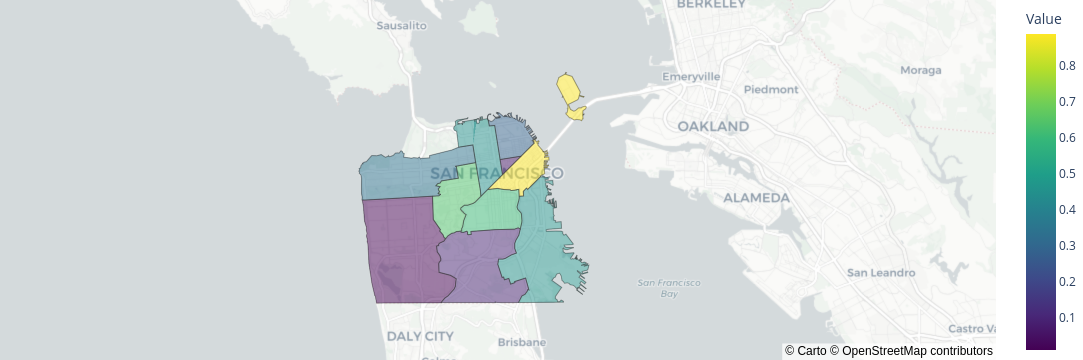

In [35]:
import plotly.express as px
from urllib.request import urlopen
import json

# Your random data for each police district
randomdata = {
    'CENTRAL': 0.283805288999638,
    'SOUTHERN': 0.8882636532075772,
    'BAYVIEW': 0.45059924801053985,
    'MISSION': 0.6000904430914474,
    'PARK': 0.6362552416309091,
    'RICHMOND': 0.3371857964893169,
    'INGLESIDE': 0.09876749056377487,
    'TARAVAL': 0.009436215026031758,
    'NORTHERN': 0.44884916837512767,
    'TENDERLOIN': 0.06616710190569974
}

df_randomdata = pd.DataFrame(list(randomdata.items()), columns=['District', 'Value'])

# Load GeoJSON data for SF police districts
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    geojson_data = json.load(response)

# Create the choropleth map using Plotly
fig = px.choropleth_mapbox(
    df_randomdata,
    geojson=geojson_data,
    locations='District',
    color='Value',
    featureidkey="properties.DISTRICT", 
    color_continuous_scale="Viridis",
    mapbox_style="carto-positron",
    zoom=10,
    center={"lat": 37.7749, "lon": -122.4194},
    opacity=0.5,
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# Show the figure
fig.show()


***Exercise: But it's crime-data. Let's do something useful and visualize where it is safest to leave your car on a Sunday.***

In [36]:
df_sunday = df[(df['DayOfWeek'] == 'Sunday') & (df['Category'].isin(focuscrimes))]
df_sunday

PdId  IncidntNum  Incident Code       Category  \
2         4018830907021    40188309           7021  VEHICLE THEFT   
4        10108108004134   101081080           4134        ASSAULT   
6        17063991304134   170639913           4134        ASSAULT   
23        4007168528160    40071685          28160      VANDALISM   
36       13053842404011   130538424           4011        ASSAULT   
...                 ...         ...            ...            ...   
2129459  16622283706244   166222837           6244  LARCENY/THEFT   
2129461  17043666216780   170436662          16780    WEAPON LAWS   
2129475  17037337128100   170373371          28100      VANDALISM   
2129491  17060209504134   170602095           4134        ASSAULT   
2129498  17055902606243   170559026           6243  LARCENY/THEFT   

                                                  Descript DayOfWeek  \
2                                        STOLEN AUTOMOBILE    Sunday   
4                                                  BATTERY    Sunday   
6                                                  BATTERY    Sunday   
23               MALICIOUS MISCHIEF, VANDALISM OF VEHICLES    Sunday   
36                           AGGRAVATED ASSAULT WITH A GUN    Sunday   
...                                                    ...       ...   
2129459                       GRAND THEFT FROM LOCKED AUTO    Sunday   
2129461  FIREARM, ARMED WHILE POSSESSING CONTROLLED SUB...    Sunday   
2129475               MALICIOUS MISCHIEF, BREAKING WINDOWS    Sunday   
2129491                                            BATTERY    Sunday   
2129498                       PETTY THEFT FROM LOCKED AUTO    Sunday   

              Date   Time  PdDistrict      Resolution  ...  \
2       2004-02-15  02:00    SOUTHERN            NONE  ...   
4       2010-11-21  17:00    SOUTHERN            NONE  ...   
6       2017-08-06  18:15    SOUTHERN            NONE  ...   
23      2004-01-18  20:00    NORTHERN            NONE  ...   
36      2013-06-30  20:27  TENDERLOIN  ARREST, BOOKED  ...   
...            ...    ...         ...             ...  ...   
2129459 2016-09-25  23:00    NORTHERN            NONE  ...   
2129461 2017-05-28  01:01  TENDERLOIN  ARREST, BOOKED  ...   
2129475 2017-05-07  00:20    NORTHERN            NONE  ...   
2129491 2017-07-23  12:15     MISSION            NONE  ...   
2129498 2017-07-09  17:00     CENTRAL            NONE  ...   

        Fix It Zones as of 2018-02-07 2 2  \
2                                     NaN   
4                                     NaN   
6                                     NaN   
23                                    NaN   
36                                    3.0   
...                                   ...   
2129459                               NaN   
2129461                              18.0   
2129475                               9.0   
2129491                              20.0   
2129498                               NaN   

         CBD, BID and GBD Boundaries as of 2017 2 2  \
2                                               NaN   
4                                               NaN   
6                                               NaN   
23                                              NaN   
36                                              6.0   
...                                             ...   
2129459                                        10.0   
2129461                                         6.0   
2129475                                         NaN   
2129491                                         9.0   
2129498                                         NaN   

         Areas of Vulnerability, 2016 2 2  \
2                                     NaN   
4                                     2.0   
6                                     2.0   
23                                    1.0   
36                                    2.0   
...                                   ...   
2129459                               2.0   
2129461           

In [37]:
df_aggregated = df_sunday.groupby('PdDistrict').size().reset_index(name='Counts')
df_aggregated

PdDistrict  Counts
0     BAYVIEW   15190
1     CENTRAL   20205
2   INGLESIDE   13513
3     MISSION   22798
4    NORTHERN   24241
5        PARK    9351
6    RICHMOND    9190
7    SOUTHERN   31451
8     TARAVAL   11610
9  TENDERLOIN   13335

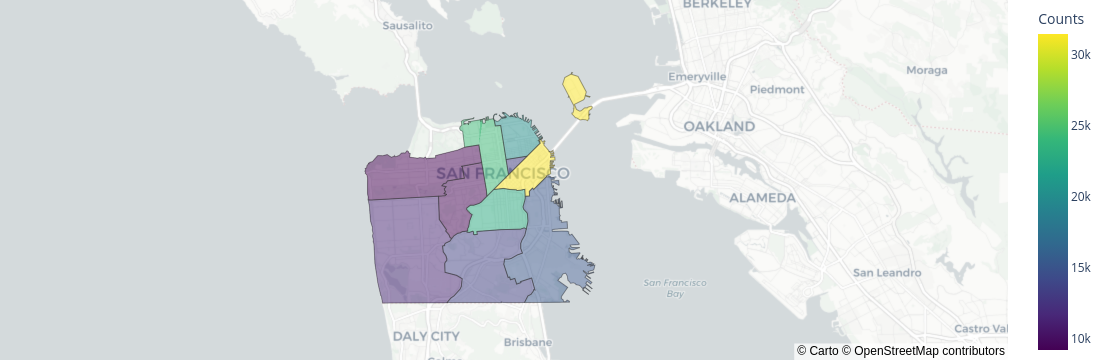

In [38]:
fig = px.choropleth_mapbox(df_aggregated, 
                           geojson=geojson_data, 
                           locations='PdDistrict', 
                           featureidkey="properties.DISTRICT", 
                           color='Counts',
                           color_continuous_scale="Viridis",
                           range_color=[df_aggregated['Counts'].min(), df_aggregated['Counts'].max()],
                           mapbox_style="carto-positron",
                           zoom=10, center = {"lat": 37.7749, "lon": -122.4194},
                           opacity=0.5)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

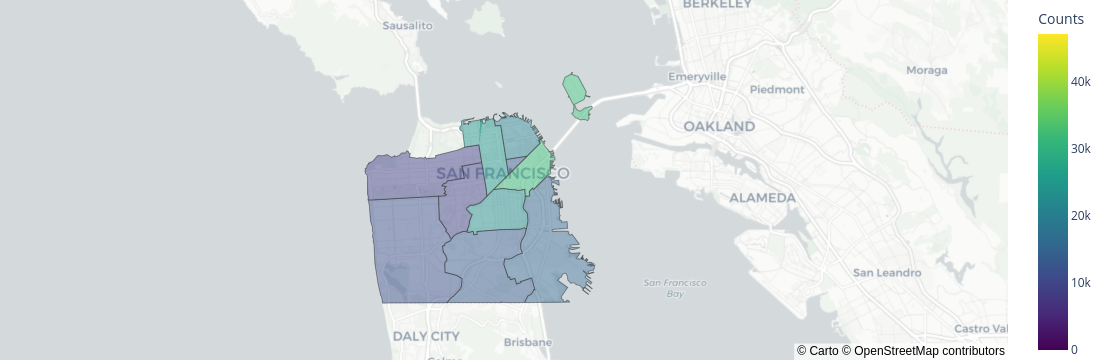

In [39]:
# Color range 0 to df_aggregated['Counts'].max()*1.5
fig = px.choropleth_mapbox(df_aggregated, 
                           geojson=geojson_data, 
                           locations='PdDistrict', 
                           featureidkey="properties.DISTRICT", 
                           color='Counts',
                           color_continuous_scale="Viridis",
                           range_color=[0, df_aggregated['Counts'].max()*1.5],
                           mapbox_style="carto-positron",
                           zoom=10, center = {"lat": 37.7749, "lon": -122.4194},
                           opacity=0.5)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()